In [1]:
import shutil
import numpy as np 
from sklearn import svm
import sys
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab.patches import cv2_imshow
import cv2
import glob
import os 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import time
from sklearn.svm import SVC
np.random.seed(220)
image_shape = (img_width,img_height) = (32,32)

In [ ]:
Change dataset to FDDB , downloaded locally with annotations 

SyntaxError: ignored

# Load Dataset

## Load dataset from Kaggle

In [2]:
# ! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
# load datasets from kaggle
! kaggle datasets download "ashwingupta3012/human-faces"
! kaggle datasets download "prasunroy/natural-images"

! unzip natural-images.zip
! unzip human-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: Humans/1 (2910).jpg     
  inflating: Humans/1 (2911).jpg     
  inflating: Humans/1 (2912).jpg     
  inflating: Humans/1 (2913).jpg     
  inflating: Humans/1 (2914).jpg     
  inflating: Humans/1 (2915).jpg     
  inflating: Humans/1 (2916).jpg     
  inflating: Humans/1 (2917).jpg     
  inflating: Humans/1 (2918).jpg     
  inflating: Humans/1 (2919).jpg     
  inflating: Humans/1 (292).jpg      
  inflating: Humans/1 (2920).jpg     
  inflating: Humans/1 (2921).jpg     
  inflating: Humans/1 (2922).jpg     
  inflating: Humans/1 (2923).jpg     
  inflating: Humans/1 (2924).jpg     
  inflating: Humans/1 (2925).jpg     
  inflating: Humans/1 (2926).jpg     
  inflating: Humans/1 (2927).jpg     
  inflating: Humans/1 (2928).jpg     
  inflating: Humans/1 (2929).jpg     
  inflating: Humans/1 (293).jpg      
  inflating: Humans/1 (2930).jpg     
  inflating: Humans/1 (2931).jpg     
  inflating: Humans/1 (2932).jpg     

## Organize dataset folders

In [4]:
# remove person folder to remove images that contain faces from dataset 
shutil.rmtree('/content/natural_images/person')

In [5]:
!rm -R Dataset

rm: cannot remove 'Dataset': No such file or directory


In [6]:
# create dataset directory
!mkdir Dataset
!mkdir Dataset/train
!mkdir Dataset/train/non_face
!mkdir Dataset/train/face
!mkdir Dataset/test
!mkdir Dataset/test/non_face
!mkdir Dataset/test/face

In [7]:
# move faces to directory
!mv Humans/*.png Dataset/train/face
!mv Humans/*.jpg Dataset/train/face
!rm -R Humans

In [8]:
#move non-faces to directory
!mv natural_images/cat/*.png Dataset/train/non_face
!mv natural_images/cat/*.jpg Dataset/train/non_face
!mv natural_images/car/*.png Dataset/train/non_face
!mv natural_images/car/*.jpg Dataset/train/non_face
!mv natural_images/dog/*.png Dataset/train/non_face
!mv natural_images/dog/*.jpg Dataset/train/non_face
!mv natural_images/flower/*.png Dataset/train/non_face
!mv natural_images/flower/*.jpg Dataset/train/non_face
!mv natural_images/fruit/*.png Dataset/train/non_face
!mv natural_images/fruit/*.jpg Dataset/train/non_face
!mv natural_images/motorbike/*.png Dataset/train/non_face
!mv natural_images/motorbike/*.jpg Dataset/train/non_face
!mv natural_images/airplane/*.png Dataset/train/non_face
!mv natural_images/airplane/*.jpg Dataset/train/non_face
!rm -R natural_images

mv: cannot stat 'natural_images/cat/*.png': No such file or directory
mv: cannot stat 'natural_images/car/*.png': No such file or directory
mv: cannot stat 'natural_images/dog/*.png': No such file or directory
mv: cannot stat 'natural_images/flower/*.png': No such file or directory
mv: cannot stat 'natural_images/fruit/*.png': No such file or directory
mv: cannot stat 'natural_images/motorbike/*.png': No such file or directory
mv: cannot stat 'natural_images/airplane/*.png': No such file or directory


In [9]:
# move files to dataset directory
ls = os.listdir('Dataset/train/face')
len(ls)
idx1 = np.random.choice(range(len(ls)),size = int(len(ls)*0.2),replace= False)
for id in idx1:   
  shutil.move(f'Dataset/train/face/{ls[id]}',f'Dataset/test/face/' )


ls2 = os.listdir('Dataset/train/non_face')
len(ls2)
idx2 = np.random.choice(range(len(ls2)),size = int(len(ls2)*0.2),replace= False)
for id in idx2:   
  shutil.move(f'Dataset/train/non_face/{ls2[id]}',f'Dataset/test/non_face/' )


# Load Samples from dataset

In [10]:

def load_examples(path, class_size, image_shape):
  ext = ['png', 'jpg'] 
  files = []
  [files.extend(glob.glob(path + '/face/*.' + e)) for e in ext]
  faces_img = [cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), 
                                         image_shape) for file in files[:class_size]]
  files.clear()
  [files.extend(glob.glob(path + '/non_face/*.' + e)) for e in ext]
  non_face_img = [cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE),
                                          image_shape) for file in files[:class_size]]
  return faces_img, non_face_img

In [11]:
faces_ds, nfaces_ds = load_examples('Dataset/train',50 , image_shape)

# Visualize Dataset

## Faces

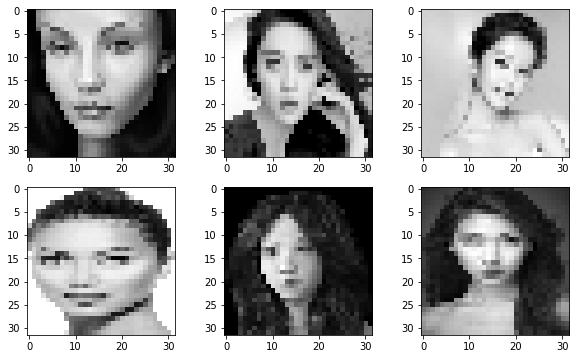

In [12]:
fig , axes = plt.subplots(2,3)
fig.set_figheight(6)
fig.set_figwidth(10)
axes[0,0].imshow(faces_ds[0], cmap= plt.cm.gray)
axes[0,1].imshow(faces_ds[1], cmap= plt.cm.gray)
axes[0,2].imshow(faces_ds[2], cmap= plt.cm.gray)
axes[1,0].imshow(faces_ds[3], cmap= plt.cm.gray)
axes[1,1].imshow(faces_ds[4], cmap= plt.cm.gray)
axes[1,2].imshow(faces_ds[5], cmap= plt.cm.gray)

## Non-Faces

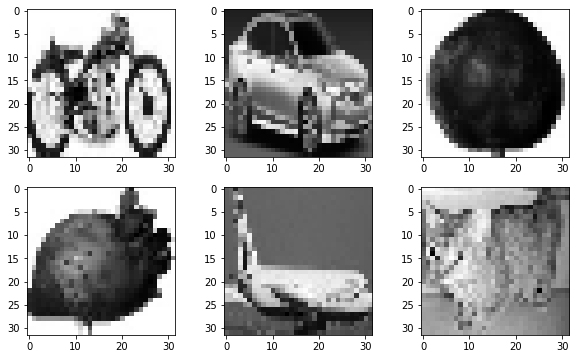

In [13]:
fig , axes = plt.subplots(2,3)
fig.set_figheight(6)
fig.set_figwidth(10)
axes[0,0].imshow(nfaces_ds[0], cmap= plt.cm.gray)
axes[0,1].imshow(nfaces_ds[1], cmap= plt.cm.gray)
axes[0,2].imshow(nfaces_ds[2], cmap= plt.cm.gray)
axes[1,0].imshow(nfaces_ds[3], cmap= plt.cm.gray)
axes[1,1].imshow(nfaces_ds[4], cmap= plt.cm.gray)
axes[1,2].imshow(nfaces_ds[5], cmap= plt.cm.gray)

# Image Preprocessing

In [ ]:
def binarize(img):
  return cv2.threshold(img, 0, 255, 0)[1]

## Integral Image

In [14]:
def get_integralimage (img): 
    # img = cv2.resize(img, (img_width,img_height))
    height,width=img.shape
    integral_image= np.zeros((height+1,width+1))#to add maargin 0 on top and on right
    for i in range(height):
        for j in range(width):
            integral_image[i][j]=img[i][j]+integral_image[i-1][j]+integral_image[i][j-1]-integral_image[i-1][j-1]#because we add the right top pixcel twice
    # integral_image = integral_image[:-1,:-1].reshape((img_width,img_height,1))
    return integral_image[:-1, :-1]  

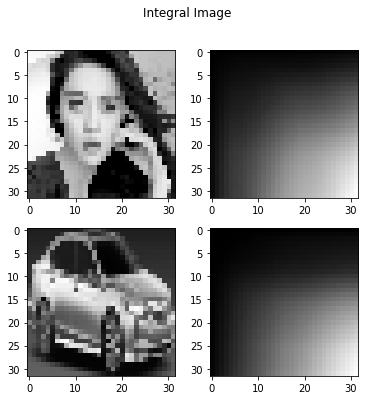

In [15]:
faces_i = get_integralimage(faces_ds[1])
nfaces_i = get_integralimage(nfaces_ds[1])
# print(faces_i)
fig , axes = plt.subplots(2,2)
fig.set_figheight(6)
fig.set_figwidth(6)
axes[0,0].imshow(faces_ds[1], cmap= plt.cm.gray)
axes[1,0].imshow(nfaces_ds[1], cmap= plt.cm.gray)
axes[0,1].imshow(faces_i, cmap= plt.cm.gray)
axes[1,1].imshow(nfaces_i, cmap= plt.cm.gray)
_ = fig.suptitle("Integral Image")

## Haar Features

In [16]:
TWO_H_FILTER = 0
TWO_V_FILTER = 1
THREE_FILTER = 2
FOUR_FILTER = 3
def extract_features(i_img,filter, rect_size):
  ## step from center of 
  rect_size-=1
  if filter == TWO_H_FILTER:
    f_img = np.empty((len(i_img)- rect_size, len(i_img[0]) - rect_size*2))
    # pad_iimg = np.pad(i_img, pad_width= point_step)
    for j in range(len(f_img)):
      for i in range(len(f_img[0])):
          f_img[j,i] = i_img[j+rect_size,i+rect_size*2]  + 2 * i_img[j, i+rect_size] + \
              i_img[j+rect_size,i] - i_img[j,i+rect_size*2] - 2 * i_img[j+rect_size,i+rect_size] -\
               i_img[j,i]
    return f_img
  elif filter == TWO_V_FILTER:
    f_img = np.empty((len(i_img)- rect_size*2, len(i_img[0]) - rect_size))
    # pad_iimg = np.pad(i_img, pad_width= point_step)
    for j in range(len(f_img)):
      for i in range(len(f_img[0])):
           f_img[j,i] = i_img[j+rect_size*2,i+rect_size]  + 2 * i_img[j+rect_size, i] - \
              2 * i_img[j+rect_size,i+rect_size] - i_img[j+rect_size*2,i] + i_img[j,i+rect_size] -\
               i_img[j,i]
    return f_img
  elif filter == THREE_FILTER:
    f_img = np.empty((len(i_img)- rect_size, len(i_img[0]) - rect_size*3))
    # pad_iimg = np.pad(i_img, pad_width= point_step)
    for j in range(len(f_img)):
      for i in range(len(f_img[0])):
          f_img[j,i] = 2 * i_img[j,i+rect_size] + 2 * i_img[j+rect_size,i+rect_size*2]\
          + i_img[j+rect_size,i] + i_img[j,i+rect_size*3] - 2 * i_img[j,i+rect_size*2]\
          - 2 * i_img[j+rect_size,i+rect_size] - i_img[j,i] - i_img[j+rect_size,i+rect_size*3]
    return f_img
  else: 
    f_img = np.empty((len(i_img)- rect_size*2, len(i_img[0]) - rect_size*2))
    # pad_iimg = np.pad(i_img, pad_width= point_step)
    for j in range(len(f_img)):
      for i in range(len(f_img[0])):
          f_img[j,i] = - i_img[j,i] + 2 * i_img[j,i+rect_size]  - i_img[j,i+rect_size*2]\
          + 2 *  i_img[j+rect_size,i] - 4 * i_img[j+rect_size,i+rect_size]  + 2* i_img[j+rect_size,i+rect_size*2]\
          -  i_img[j+rect_size*2,i] + 2 * i_img[j+rect_size*2,i+rect_size]  - i_img[j+rect_size*2,i+rect_size*2]
    return f_img


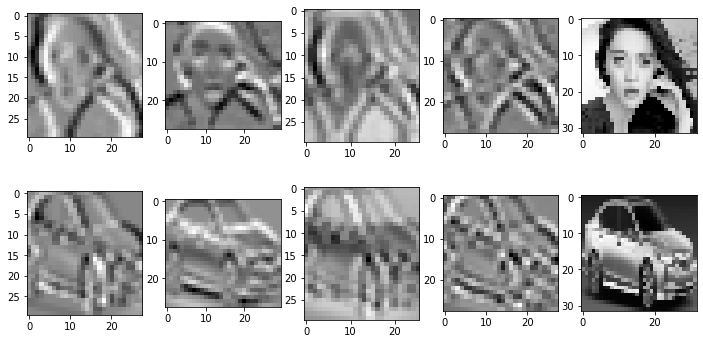

In [17]:

fig , axes = plt.subplots(2,5)
fig.set_figheight(6)
fig.set_figwidth(12)
# filter TWO H
fi_img_h = extract_features(faces_i, TWO_H_FILTER, 3); 
nfi_img_h = extract_features(nfaces_i, TWO_H_FILTER, 3); 
axes[0,0].imshow(fi_img_h, cmap= plt.cm.gray) 
axes[1,0].imshow(nfi_img_h, cmap= plt.cm.gray) 

# filter TWO V
fi_img_v = extract_features(faces_i, TWO_V_FILTER, 3); 
nfi_img_v = extract_features(nfaces_i, TWO_V_FILTER, 3); 
axes[0,1].imshow(fi_img_v, cmap= plt.cm.gray) ;
axes[1,1].imshow(nfi_img_v, cmap= plt.cm.gray) ;

# filter THREE
fi_img_t = extract_features(faces_i, THREE_FILTER, 3); 
nfi_img_t = extract_features(nfaces_i, THREE_FILTER, 3); 
axes[0,2].imshow(fi_img_t, cmap= plt.cm.gray) ;
axes[1,2].imshow(nfi_img_t, cmap= plt.cm.gray) ;

# filter FOUR
fi_img_f = extract_features(faces_i, FOUR_FILTER, 3); 
nfi_img_f = extract_features(nfaces_i, FOUR_FILTER, 3); 
axes[0,3].imshow(fi_img_f, cmap= plt.cm.gray) ;
axes[1,3].imshow(nfi_img_f, cmap= plt.cm.gray) ;

axes[0,4].imshow(faces_ds[1], cmap= plt.cm.gray) ;
axes[1,4].imshow(nfaces_ds[1], cmap= plt.cm.gray) ;

## Extract Features

In [18]:
def prepare(img):
  i_img = get_integralimage(img)
  img1 = cv2.resize(extract_features(img, TWO_H_FILTER, 3), image_shape, 0.5 ,0.5).flatten()
  img2 = cv2.resize(extract_features(img, TWO_V_FILTER, 3), image_shape, 0.5 ,0.5).flatten()
  img3 = cv2.resize(extract_features(img, THREE_FILTER, 3), image_shape, 0.5 ,0.5).flatten()
  img4 = cv2.resize(extract_features(img, FOUR_FILTER, 3), image_shape, 0.5 ,0.5).flatten()
  return img1, img2, img3, img4

# Load Prepared Dataset (feature extracted)

In [19]:
def load_dataset(path, class_size, image_shape):
  ext = ['png', 'jpg'] 
  files = []
  [files.extend(glob.glob(path + '/face/*.' + e)) for e in ext]
  faces_img1 = []
  faces_img2 = [] 
  faces_img3 = [] 
  faces_img4 = [] 
  
  for file in files[:class_size]:
          img1, img2, img3, img4 = prepare(cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), 
                                         image_shape))
          faces_img1.append(img1)
          faces_img2.append(img2)
          faces_img3.append(img3)
          faces_img4.append(img4)
  # faces_img = np.array(faces_img, dtype = object)
  labels = np.ones((class_size,1))
  faces_img1 = np.append(faces_img1,labels, axis = 1)
  faces_img2 = np.append(faces_img2,labels, axis = 1)
  faces_img3 = np.append(faces_img3,labels, axis = 1)
  faces_img4 = np.append(faces_img4,labels, axis = 1)

  files.clear()
  [files.extend(glob.glob(path + '/non_face/*.' + e)) for e in ext]
  no_faces_img1 = []
  no_faces_img2 = []
  no_faces_img3 = []
  no_faces_img4 = []
  for file in files[:class_size]:
          img1, img2, img3, img4 = prepare(cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), 
                                         image_shape))
          no_faces_img1.append(img1)
          no_faces_img2.append(img2)
          no_faces_img3.append(img3)
          no_faces_img4.append(img4)
  # faces_img = np.array(faces_img, dtype = object)
  labels = np.zeros((class_size,1))
  no_faces_img1 = np.append(no_faces_img1,labels, axis = 1)
  no_faces_img2 = np.append(no_faces_img2,labels, axis = 1)
  no_faces_img3 = np.append(no_faces_img3,labels, axis = 1)
  no_faces_img4 = np.append(no_faces_img4,labels, axis = 1)
  f1_ds = np.append(faces_img1, no_faces_img1, 0)
  f2_ds = np.append(faces_img2, no_faces_img2, 0)
  f3_ds = np.append(faces_img3, no_faces_img3, 0)
  f4_ds = np.append(faces_img4, no_faces_img4, 0)
  return f1_ds, f2_ds, f3_ds, f4_ds



In [20]:
# shuffle dataset 
f1_ds, f2_ds, f3_ds, f4_ds = load_dataset('Dataset/train', 4000, image_shape)
axes = np.random.choice(range(len(f1_ds)),size = len(f1_ds), replace = False)
f1_ds = f1_ds[axes]
f2_ds = f2_ds[axes]
f3_ds = f3_ds[axes]
f4_ds = f4_ds[axes]

## Split Dataset (Trian, test) (0.9 , 0.1)

In [21]:
#split dataset into three splits
x1_train = f1_ds[:len(f1_ds)*8//10]
x1_valid = f1_ds[len(f1_ds)*8//10:len(f1_ds)*9//10]
x1_test = f1_ds[len(f1_ds)*9//10:]

x2_train = f2_ds[:len(f2_ds)*8//10]
x2_valid = f2_ds[len(f2_ds)*8//10:len(f1_ds)*9//10]
x2_test = f2_ds[len(f2_ds)*9//10:]

x3_train = f3_ds[:len(f3_ds)*8//10]
x3_valid = f3_ds[len(f3_ds)*8//10:len(f1_ds)*9//10]
x3_test = f3_ds[len(f3_ds)*9//10:]

x4_train = f4_ds[:len(f4_ds)*8//10]
x4_valid = f4_ds[len(f4_ds)*8//10:len(f1_ds)*9//10]
x4_test = f4_ds[len(f4_ds)*9//10:]


In [22]:
x2_train.shape

(6400, 1025)

In [23]:
# mu1 = np.mean(x1_train)
# x1_train -= mu1
# x1_valid -= mu1
# x1_test -= mu1
# max1 = np.max(abs(x1_train))
# x1_train /= max1
# x1_test /= max1
# x1_test /= max1
 
# mu2 = np.mean(x2_train)
# x2_train -= mu2
# x2_test -= mu2
# x2_test -= mu2
# max2 = np.max(abs(x2_train))
# x2_train /= max2
# x2_test /= max2
# x2_test /= max2

# mu3 = np.mean(x3_train)
# x3_train -= mu3
# x3_test -= mu3
# x3_test -= mu3
# max3 = np.max(abs(x3_train))
# x3_train /= max3
# x3_test /= max3
# x3_test /= max3

# mu4 = np.mean(x4_train)
# x4_train -= mu4
# x4_test -= mu4
# x4_test -= mu4
# max4 = np.max(abs(x4_train))
# x4_train /= max4
# x4_test /= max4
# x4_test /= max4

In [24]:
x_train = (x1_train.copy(), x2_train.copy(), x3_train.copy(), x4_train.copy())
x_valid = (x1_valid.copy(), x2_valid.copy(), x3_valid.copy(), x4_valid.copy())
x_test = (x1_test.copy(), x2_test.copy(), x3_test.copy(), x4_test.copy())

In [25]:
x_train[0].min(), x_valid[0].min(), x_test[0].min()

(-741.96875, -671.0, -681.185546875)

# Redundant Trials 

In [ ]:
# fi_img_h = fi_img_h/np.max(fi_img_h) * 255
# fi_img_v = fi_img_v/np.max(fi_img_v) * 255
# fi_img_t = fi_img_t/np.max(fi_img_t) * 255
# fi_img_f = fi_img_f/np.max(fi_img_f) * 255
# nfi_img_h = nfi_img_h/np.max(nfi_img_h) * 255
# nfi_img_v = nfi_img_v/np.max(nfi_img_v) * 255
# nfi_img_t = nfi_img_t/np.max(nfi_img_t) * 255
# nfi_img_f = nfi_img_f/np.max(nfi_img_f) * 255


In [ ]:

# ret, thresh1 = cv2.threshold(fi_img_h, 0, 255, 0)
# ret, thresh2 = cv2.threshold(fi_img_v, 0, 255, 0)
# ret, thresh3 = cv2.threshold(fi_img_t, 0, 255, 0)
# ret, thresh4 = cv2.threshold(fi_img_f, 0, 255, 0)

# ret, thresh11 = cv2.threshold(nfi_img_h, 0, 255, 0)
# ret, thresh21 = cv2.threshold(nfi_img_v, 0, 255, 0)
# ret, thresh31 = cv2.threshold(nfi_img_t, 0, 255, 0)
# ret, thresh41 = cv2.threshold(nfi_img_f, 0, 255, 0)

# fig , axes = plt.subplots(2,4)
# fig.set_figheight(6)
# fig.set_figwidth(12)
# axes[0,0].imshow( thresh1 , cmap= plt.cm.gray)
# axes[0,1].imshow( thresh2 , cmap= plt.cm.gray)
# axes[0,2].imshow( thresh3 , cmap= plt.cm.gray)
# axes[0,3].imshow( thresh4 , cmap= plt.cm.gray)
# axes[1,0].imshow( thresh11, cmap= plt.cm.gray)
# axes[1,1].imshow( thresh21, cmap= plt.cm.gray)
# axes[1,2].imshow( thresh31, cmap= plt.cm.gray)
# axes[1,3].imshow( thresh41, cmap= plt.cm.gray)

In [ ]:
# ex1=  np.append(fi_img_f.flatten(),np.append(fi_img_t.flatten()
#                 ,np.append(fi_img_h.flatten(),fi_img_v.flatten())))
# dataset = np.empty((2,ex1.shape[0]))
# dataset[0] = ex1
# dataset[1] = np.append(nfi_img_f.flatten(),np.append(nfi_img_t.flatten()
#                 ,np.append(nfi_img_h.flatten(),nfi_img_v.flatten())))


In [ ]:
# path = '/content/Dataset/train/face/1 (5779).jpg'
# img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# start_time = time.time()
# img = cv2.resize(img, image_shape)
# _ = prepare(img)
# total_time = time.time() - start_time
# # prepare(cv2.resize()
# print(total_time)

In [ ]:
# x = np.array([prepare(np.ones((16,16))) for i in range(3)])
# x[:,0].reshape((3,len(x[:,0][0])))
# os.listdir(path)

In [ ]:
# len(os.listdir('Dataset/train/face'))
# len(os.listdir('Dataset/train/non_face'))

In [ ]:
# f1_train = x_train[:,0]
# f2_train = x_train[:,1]
# f3_train = x_train[:,2]
# f4_train = x_train[:,3]
# Y = x_train[:,-1]
# (x_train[:,0].reshape((len(x_train),x_train[:,0][0].shape[0]))).shape


In [ ]:
# def learn_model(x_train, x_valid, y_train, y_valid):
#     #build model 
   
#     input_layer = tf.keras.layers.Input(shape = (x_train[0].shape[0],))
#     layer = tf.keras.layers.Flatten()(input_layer)
#     layer = tf.keras.layers.Rescaling(1/255.0)(layer)
#     layer = tf.keras.layers.Dense(16, activation = 'relu')(layer)
#     layer = tf.keras.layers.Dropout(0.3)(layer)
#     out_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')(layer)
#     clf = tf.keras.Model(inputs= input_layer , outputs = out_layer)
#     clf.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
#                 loss = tf.keras.losses.BinaryCrossentropy(),metrics = ['accuracy'])
#     #tune model 
#     epochs = range(1,100,1)
#     max_acc = 0
#     best_clf = None
#     valid_acc = []
#     train_acc = []
#     for epoch in epochs:
#         result = clf.fit(x_train, y_train, batch_size = 300,epochs = 1, verbose = 0)
#         y_train_pred = np.where(clf.predict(x_train).flatten() > 0.5, 1, 0)
#         y_valid_pred = np.where(clf.predict(x_valid).flatten() > 0.5, 1, 0)
#         # print(y_valid_pred == y_valid)
#         valid_acc.extend([(y_valid_pred == y_valid).mean()])
#         train_acc.extend([(y_train_pred == y_train).mean()])
#         # if (y_pred == y_valid.flatten()).mean() > max_acc: 
#         #   max_acc = (y_pred == y_valid.flatten()).mean()
#         #   best_clf = clf
#     return train_acc, valid_acc

In [ ]:
# train_acc, valid_acc = learn_model(x_train[:,:-1], x_valid[:,:-1], x_train[:,-1], x_valid[:,-1])

In [ ]:
# plt.plot(range(1,100,1), train_acc)
# plt.plot(range(1,100,1), valid_acc)
# plt.legend(['Train', 'Valid'])
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# Models Training

In [26]:
# def  (x_train, x_valid, y_train, y_valid, W):
def learn_model(x_train, W):
    #build model 
    
    #tune model 
    # epochs = [10, 30, 90, 120, 200 ]
    min_err = sys.maxsize
    best_clf = None
    for feature in range(4): 
      y_train = x_train[feature][:,-1]
      X = x_train[feature][:,:-1]
      input_layer = tf.keras.layers.Input(shape = (len(X[0]),))
      layer = tf.keras.layers.Flatten()(input_layer)
      # layer = tf.keras.layers.Rescaling(1/255.0)(layer)
      layer = tf.keras.layers.Dense(8, activation = 'relu')(layer)
      layer = tf.keras.layers.Dropout(0.3)(layer)
      # layer = tf.keras.layers.Dense(16, activation = 'relu')(layer)
      # layer = tf.keras.layers.Dropout(0.2)(layer)
      out_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')(layer)
      clf = tf.keras.Model(inputs= input_layer , outputs = out_layer)
      clf.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2),
                  loss = tf.keras.losses.BinaryCrossentropy(),metrics = ['accuracy'])
      for epoch in range(200):
          result = clf.fit( X, y_train, batch_size = 600,epochs = 1, verbose = 0)
          y_pred = np.where(clf.predict(X).flatten() > 0.5, 1, 0)
          # print(np.alltrue(y_pred==y_train))
          err_rate = np.sum(W[y_pred != y_train])
          # train_acc = svm_cl.score(x_train,y_train)
          # valid_acc = svm_cl.score(x_valid,y_valid)
          # acc_list.append([k, g, train_acc, valid_acc])
          if err_rate < min_err: 
            best_clf = (clf, feature, epoch)
            min_err = err_rate
    return best_clf


# update weights according to classifier h_m
def update_weights(preds, Y, W):
    #prepare inputs 
    preds = np.where(preds > 0.5, 1, -1)
    Y = np.where(Y > 0, 1, -1)
    preds = preds.reshape(Y.shape)

    #calculate error
    err = np.sum(W[preds != Y])
    # if error is zero , return zero array weights
    if err == 0:
        print('error rate is zero')
        return np.zeros(W.shape), 1
    # calculate alpha 
    alpha = 0.5 * np.log2((1-err)/err)
    #update weights 
    W = W * np.exp(-alpha * Y * preds).reshape(W.shape)
    #normalize weights 
    W  /= W.sum()
    return W, alpha
    

# error rate of classifier h_m 
def error_rate(preds, Y):
    return np.mean(preds.reshape(Y.shape) != Y)

def predict(X,H_set):
    # prepare predictions and alpha matrix 
    # each column represents classifier in H_set
    #each row represets example in X set 
    preds = np.zeros((len(X[0]), len(H_set)))
    #predict output for each classifier in H_set and update matrix preds and alpha
    for i, (h,alpha,feature, epochs) in enumerate(H_set):
        p = h.predict(X[feature][:,:-1]).flatten() 
        preds[:,i] = np.where(p>0.5,1,-1) * alpha

    # sum alpha of classifiers vote prediction is one
    sums = preds.sum(axis= 1)
    # return true if alpha sum of ones is larger than alpha sum of zeros
    return sums > 0


# calculate total_error rate
# ignore classfier at index except i
def total_error_rate(H_set, X, except_i):
    # to handle if no h in set preds will not be updated 
    # and will remain zero which is not correct since it will be assumed
    # as predictions and error rate will not be right
    H_set_cp = H_set.copy()
    if len(H_set_cp) == 0:
        return sys.maxsize

    # remove classifier at except_i position
    if except_i is not None:
      H_set_cp = np.delete(H_set_cp,except_i,0)
    # prediction based on voting of multible h
    preds  = predict(X, H_set_cp)
    # change prediction form as in lecture
    
    #calculate error rate of voted prediction  
    return error_rate(preds,X[0][:,-1]) 

# get index of least significan classifier from classifiers set
def get_least_significant_h(H_set, X):
    # error rate of all classifiers
    total_err_rate = total_error_rate(H_set, X, None)
    print('total_error_rate', total_err_rate)
    #error rate of classifiers removing at index i
    err_list = [total_error_rate(H_set, X, i) for i in range(len(H_set))]
    print('alphas:',np.array(H_set)[:,-2])
    print('error_list',err_list)
    # min error rate 
    min_err = np.min(err_list)
    # if min error rate is less than total error rate
    # then classifier at argmin(errlist) should be removed
    # return its index
    if min_err < total_err_rate:
      return np.argmin(err_list), min_err
    else:
      return -1, total_err_rate

def generate_data_set(X, W):
    #generate new bootstrapping with probability equal to weight vector for each example
    idx = np.random.choice(np.arange(0,X[0].shape[0], 1),replace = True, size = X[0].shape[0], p = W.flatten())
    X = (X[0][idx],X[1][idx],X[2][idx],X[3][idx])
    return X, W[idx]

# float boost procedure
# X training examples 
# M_max max No. of weak classifiers
# e_star acceptance threshold of error rate
def AdaBoost(X, N, M_max, e_star):
    # N = X.shape[0]
    #initialize weights for each example 
    #shape N x 1
    W = np.ones((N, 1))
    W /= N
    
    # current No. of h trained
    M = -1
    # hypothesises set
    H_set = []
    
    # prev total error rate
    prev_tot_err_rate = sys.maxsize
    org_x  = X

    error_rate_hist = []
    # Forward Inclusion
    while True: 
        M += 1
        print("learn classifier")
        (h_m, feature, epochs) = learn_model(X, W)
      
        # (h_m,feature) = learn_model(X[:,:-1],x_valid[:,:-1],X[:,-1], x_valid[:,-1], W)
        #predict values 
        preds = h_m.predict(X[feature][:,:-1]).flatten() > 0.5
        
        #update weights of examples based on chosen h
        (W, alpha) = update_weights(preds, X[feature][:, -1].flatten(), W)
        
        # add classifier to list 
        H_set.extend([(h_m, alpha, feature, epochs)])

        error_rate_hist.extend([predict_fboost(H_set, org_x)[0]])
        
        # if max h or error rate less than threshold end
        if M == M_max-1 or prev_tot_err_rate < e_star:
            break
        # if weight sum equal zero, all examples correclty classified
        # end 
        if(W.sum() == 0):
          break
        # generate new dataset with weight vector distribution
        X, W = generate_data_set(X,W)

     # check if there are non-usefull classifers and remove them 

    #Conditional Exclusion
    # while len(H_set) > 1:
    #     #get least significant h (removing it causes largest decrease in total error rate)
    #     least_sign_h_idx, min_err = get_least_significant_h(H_set, org_x)
    #     #if least_significant h not useful remove it
    #     if least_sign_h_idx == -1:
    #       prev_tot_err_rate = min_err
    #       print('h set not changed')
    #       break
    #     print('remove h at index', least_sign_h_idx)
    #     H_set.remove(H_set[least_sign_h_idx])
    #     prev_tot_err_rate = min_err
    # return list of classifiers 
    return H_set, error_rate_hist

    
def EFloatBoost(X , N, M_max, e_star):
    # N = X.shape[0]
    #initialize weights for each example 
    #shape N x 1
    W = np.ones((N, 1))
    W /= N
    
    # current No. of h trained
    M = -1
    # hypothesises set
    H_set = []
    
    # prev total error rate
    prev_tot_err_rate = sys.maxsize
    org_x  = X

    error_rate_hist = []
    # Forward Inclusion
    while True: 
        M += 1
        print("learn classifier")
        (h_m,feature, epochs) = learn_model(X, W)
        # (h_m,feature) = learn_model(X[:,:-1],x_valid[:,:-1],X[:,-1], x_valid[:,-1], W)
        #predict values 
        preds = h_m.predict(X[feature][:,:-1]).flatten() > 0.5
        
        #update weights of examples based on chosen h
        (W, alpha) = update_weights(preds, X[feature][:, -1].flatten(), W)
        
        # add classifier to list 
        H_set.extend([(h_m, alpha, feature, epochs)])
        

        error_rate_hist.extend([predict_fboost(H_set, org_x)[0]])


        # if max h or error rate less than threshold end
        if M == M_max-1 or prev_tot_err_rate < e_star:
            break
        # if weight sum equal zero, all examples correclty classified
        # end 
        if(W.sum() == 0):
          break
        # generate new dataset with weight vector distribution
        X, W = generate_data_set(X,W)

     # check if there are non-usefull classifers and remove them 

    #Conditional Exclusion
    while len(H_set) > 1:
        #get least significant h (removing it causes largest decrease in total error rate)
        least_sign_h_idx, min_err = get_least_significant_h(H_set, org_x)
        prev_tot_err_rate = min_err
        #if least_significant h not useful remove it
        if least_sign_h_idx == -1:
          print('h set not changed')
          break
        print('remove h at index', least_sign_h_idx)
        H_set.remove(H_set[least_sign_h_idx])
    # return list of classifiers 
    return H_set, error_rate_hist

def FloatBoost(X, N, M_max, e_star):
    # N = X.shape[0]
    #initialize weights for each example 
    #shape N x 1
    W = np.ones((N, 1))
    W /= N
    
    # current No. of h trained
    M = -1
    # hypothesises set
    H_set = []
    
    # prev total error rate
    prev_tot_err_rate = sys.maxsize
    org_x  = X

    error_rate_hist = []
    # Forward Inclusion
    while True: 
        M += 1
        print("learn classifier")
        (h_m,feature, epochs) = learn_model(X, W)
        # (h_m,feature) = learn_model(X[:,:-1],x_valid[:,:-1],X[:,-1], x_valid[:,-1], W)
        #predict values 
        preds = h_m.predict(X[feature][:,:-1]).flatten() > 0.5
        
        #update weights of examples based on chosen h
        (W, alpha) = update_weights(preds, X[feature][:, -1].flatten(), W)
        
        # add classifier to list 
        H_set.extend([(h_m, alpha, feature, epochs)])
        
 
        # if weight sum equal zero, all examples correclty classified
        # end 
        # check if there are non-usefull classifers and remove them 
        #Conditional Exclusion
        while len(H_set) > 1:
            #get least significant h (removing it causes largest decrease in total error rate)
            least_sign_h_idx, min_err = get_least_significant_h(H_set, org_x)
            #if least_significant h not useful remove it
            prev_tot_err_rate = min_err
            if least_sign_h_idx == -1:
              print('h set not changed')
              break
            print('remove h at index', least_sign_h_idx)
            H_set.remove(H_set[least_sign_h_idx])
              # if max h or error rate less than threshold end
        error_rate_hist.extend([predict_fboost(H_set, org_x)[0]])
        
        if M == M_max-1 or prev_tot_err_rate < e_star:
            break
        if(W.sum() == 0):
          break
        # generate new dataset with weight vector distribution
        X, W = generate_data_set(X,W)
    # return list of classifiers 
    return H_set, error_rate_hist
# predict class according to classifiers set of float boost algorithm
def predict_fboost(H_set, X):
    p = predict(X, H_set) 
    return 100 * np.mean(p ==  X[0][:,-1]), p

## FloatBoost


In [27]:
start_time = time.time()
H_set1, err_rate_hist1 = FloatBoost(x_train, len(x_train[0]) , 10, 0.05)
print(time.time() - start_time)

learn classifier
learn classifier
total_error_rate 0.31265625
alphas: [1 2]
error_list [0.31265625, 0.03640625]
remove h at index 1
694.3037967681885


In [ ]:
x_train[0].shape

(6400, 1025)

Number of classifiers selected (train set): 1
Total accuracy % 96.359375
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      3200
         1.0       0.95      0.97      0.96      3200

    accuracy                           0.96      6400
   macro avg       0.96      0.96      0.96      6400
weighted avg       0.96      0.96      0.96      6400



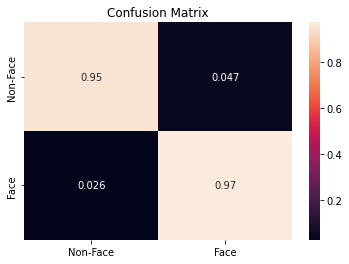

In [28]:
acc , preds = predict_fboost(H_set1, x_train)
print("Number of classifiers selected (train set):", len(H_set1))
print("Total accuracy %", acc)
sns.heatmap(confusion_matrix( x_train[0][:,-1], preds, normalize = 'true'),annot = True)
plt.title('Confusion Matrix')
plt.xticks([0.5,1.5], ['Non-Face', 'Face'])
plt.yticks([0.5,1.5], ['Non-Face', 'Face'])
print(classification_report(x_train[0][:,-1], preds))

              precision    recall  f1-score   support

         0.0       0.85      0.73      0.79       402
         1.0       0.76      0.87      0.81       398

    accuracy                           0.80       800
   macro avg       0.81      0.80      0.80       800
weighted avg       0.81      0.80      0.80       800



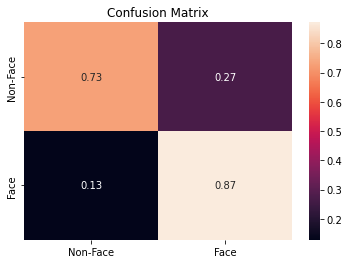

In [29]:
acc , preds = predict_fboost(H_set1, x_valid)
# print("Number of classifiers selected (test set):", len(H_set))
sns.heatmap(confusion_matrix( x_valid[0][:,-1], preds,normalize = 'true'),annot = True)
plt.title('Confusion Matrix')
plt.xticks([0.5,1.5], ['Non-Face', 'Face'])
plt.yticks([0.5,1.5], ['Non-Face', 'Face'])
print(classification_report(x_valid[0][:,-1], preds))

## Extented FloatBoost

In [30]:
start_time = time.time()
H_set2, err_rate_hist2 = EFloatBoost(x_train, len(x_train[0]) , 10, 0.05)
print(time.time() - start_time)

learn classifier
learn classifier
learn classifier
learn classifier
learn classifier
error rate is zero
total_error_rate 0.46734375
alphas: [1 0 1 0 0]
error_list [0.53140625, 0.4890625, 0.38015625, 0.1909375, 0.46734375]
remove h at index 3
total_error_rate 0.1909375
alphas: [1 0 1 0]
error_list [0.5546875, 0.29953125, 0.185, 0.1909375]
remove h at index 2
total_error_rate 0.185
alphas: [1 0 0]
error_list [0.31515625, 0.03390625, 0.03390625]
remove h at index 1
total_error_rate 0.03390625
alphas: [1 0]
error_list [0.50515625, 0.03390625]
h set not changed
1724.2873651981354


Number of classifiers selected (train set): 2
Total accuracy % 96.609375
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      3200
         1.0       0.97      0.96      0.97      3200

    accuracy                           0.97      6400
   macro avg       0.97      0.97      0.97      6400
weighted avg       0.97      0.97      0.97      6400



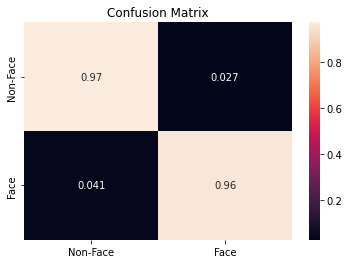

In [31]:
acc , preds = predict_fboost(H_set2, x_train)
print("Number of classifiers selected (train set):", len(H_set2))
print("Total accuracy %", acc)
sns.heatmap(confusion_matrix( x_train[0][:,-1], preds, normalize = 'true'),annot = True)
plt.title('Confusion Matrix')
plt.xticks([0.5,1.5], ['Non-Face', 'Face'])
plt.yticks([0.5,1.5], ['Non-Face', 'Face'])
print(classification_report(x_train[0][:,-1], preds))

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       402
         1.0       0.79      0.85      0.82       398

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



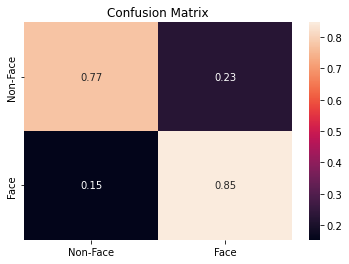

In [32]:
acc , preds = predict_fboost(H_set2, x_valid)
# print("Number of classifiers selected (test set):", len(H_set))
sns.heatmap(confusion_matrix( x_valid[0][:,-1], preds,normalize = 'true'),annot = True)
plt.title('Confusion Matrix')
plt.xticks([0.5,1.5], ['Non-Face', 'Face'])
plt.yticks([0.5,1.5], ['Non-Face', 'Face'])
print(classification_report(x_valid[0][:,-1], preds))

## AdaBoost (No model selection)

In [33]:
start_time = time.time()
H_set3, err_rate_hist3 = AdaBoost(x_train, len(x_train[0]) , 10, 0.05)
print(time.time() - start_time)

learn classifier
learn classifier
learn classifier
learn classifier
learn classifier
error rate is zero
1694.3509213924408


Number of classifiers selected (train set): 5
Total accuracy % 50.90625
              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49      3200
         1.0       0.51      0.55      0.53      3200

    accuracy                           0.51      6400
   macro avg       0.51      0.51      0.51      6400
weighted avg       0.51      0.51      0.51      6400



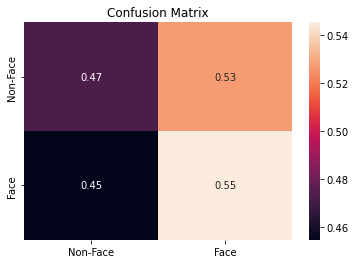

In [34]:
acc , preds = predict_fboost(H_set3, x_train)
print("Number of classifiers selected (train set):", len(H_set3))
print("Total accuracy %", acc)
sns.heatmap(confusion_matrix( x_train[0][:,-1], preds, normalize = 'true'),annot = True)
plt.title('Confusion Matrix')
plt.xticks([0.5,1.5], ['Non-Face', 'Face'])
plt.yticks([0.5,1.5], ['Non-Face', 'Face'])
print(classification_report(x_train[0][:,-1], preds))

              precision    recall  f1-score   support

         0.0       0.52      0.48      0.50       402
         1.0       0.51      0.55      0.53       398

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



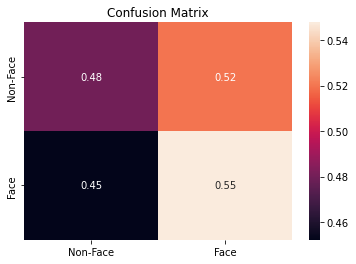

In [35]:
acc , preds = predict_fboost(H_set3, x_valid)
# print("Number of classifiers selected (test set):", len(H_set))
sns.heatmap(confusion_matrix( x_valid[0][:,-1], preds,normalize = 'true'),annot = True)
plt.title('Confusion Matrix')
plt.xticks([0.5,1.5], ['Non-Face', 'Face'])
plt.yticks([0.5,1.5], ['Non-Face', 'Face'])
print(classification_report(x_valid[0][:,-1], preds))

In [38]:
one_exampel = (x_test[0][:4],x_test[1][:4],x_test[2][:4],x_test[3][:4] )
start_time = time.time()
print(predict_fboost(H_set1, one_exampel))
pred_time=  time.time() - start_time
print("prediction time = ",round(pred_time/2,4))

# second
start_time = time.time()
print(predict_fboost(H_set2, one_exampel))
pred_time=  time.time() - start_time
print("prediction time = ",round(pred_time/2,4))

#third 
start_time = time.time()
print(predict_fboost(H_set3, one_exampel))
pred_time=  time.time() - start_time
print("prediction time = ",round(pred_time/2,4))

(100.0, array([ True,  True,  True, False]))
prediction time =  0.0305
(100.0, array([ True,  True,  True, False]))
prediction time =  0.0638
(75.0, array([ True,  True, False, False]))
prediction time =  0.16


## Save Trained Model

In [41]:
i = 0
f = open('h_props.txt','w')
for h, alpha, feature, epochs in H_set2:
  h.save(f'h{i}.h5')
  f.write(f"{alpha} {feature} {epochs}\n")
  i+=1
f.close()

# Face Detector Scanner

In [43]:
h0 = tf.keras.models.load_model('h0.h5')
h1 = tf.keras.models.load_model('h1.h5')
H_set = [(h0,2.9, 0), (h1, 1 , 0)]

## Single Image Preprocessing

In [76]:
def prepare_single_img(path, width, height):
  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (width,height), 0.5, 0.5)
  i_img = get_integralimage(img)
  img1 = extract_features(img, TWO_H_FILTER, 3)
  img2 = extract_features(img, TWO_V_FILTER, 3)
  img3 = extract_features(img, THREE_FILTER, 3)
  img4 = extract_features(img, FOUR_FILTER, 3)
  (w,h) = (np.min([img1.shape[1],img2.shape[1],img3.shape[1],img4.shape[1]]),
           np.min([img1.shape[0],img2.shape[0],img3.shape[0],img4.shape[0]]))
  return img[:h, :w],(img1[:h, :w],img2[:h, :w],img3[:h, :w],img4[:h, :w],)

# def normalize(X):
#   return (X[0] - mu1)/max1,(X[1] - mu2)/max2,(X[2] - mu3)/max3,(X[3] - mu4)/max4 

## Image Scanning and Face Detection

In [61]:
def predicts(i, j, wsize, X, H_set):
    preds = np.zeros((len(H_set),))
    for k, (h,alpha,feature, epochs) in enumerate(H_set):
        window = cv2.resize(X[feature][i:i+wsize, j:j+wsize], image_shape, 0.5, 0.5)
        # plt.imshow(window,cmap = plt.cm.gray)
        # plt.show()
        p = h.predict(window.reshape((1,len(window.flatten())))).flatten() 
        preds[k] = np.where(p>0.5,1,-1) * alpha
    # sum alpha of classifiers vote prediction is one
    sums = preds.sum()
    # return true if alpha sum of ones is larger than alpha sum of zeros
    # print(sums)
    return sums > 0

In [55]:
# detector scanning
def scan_image(X, wsize,  shift, H_set):
  preds = []
  for i in range(0,len(X[0]) - wsize + 1, shift):
    for j in range(0,len(X[0][0]) - wsize +1, shift):
      if predicts(i, j, wsize, X ,  H_set):
        # print('face detected')
        preds.append([i, j, wsize, wsize])
  return preds

In [56]:
def detect_faces(X, H_set):
  multi_scale_preds = []
  scale = 1.5
  wsize = min((X[0].shape[0], X[0].shape[1]))
  for i in range(3):
    # print(f"scale {i}")
    multi_scale_preds.append(scan_image(X, wsize, int(wsize/2), H_set))
    wsize = int(wsize / scale)
  return multi_scale_preds

## Visualize Detected Faces

In [52]:

def draw_grouped_rects(img,rects, eps = 1, color = 255):
  # cv2.imwrite('bounding_box.jpg', img)
  # global multi_scale_preds
  # preds = np.asarray(rects)
  # preds = preds.reshape((len(preds)//4,4))
  new_groups = []
  grouped_preds = []
  for group in rects:
    grouped_preds = cv2.groupRectangles(group,groupThreshold = 1, eps = 1)
    try:
      new_groups.append(grouped_preds[0][0].tolist())
    except:
      pass
  # print(new_groups)
  if len(new_groups)> 1:
   grouped_preds = cv2.groupRectangles(new_groups,groupThreshold = 1, eps = 1)
  for j, i , ws, _ in grouped_preds[0]:
      test_img1 = img.copy()
      test_img1 = cv2.rectangle(test_img1, (i,j),(i+ws-1,j+ws-1),(color,color,color),2)
      plt.imshow(test_img1,cmap= plt.cm.gray)
      plt.show()

def draw_all_rects(img,rects, color = 255):
  # cv2.imwrite('bounding_box.jpg', img)
  # global multi_scale_preds
  # preds = np.asarray(rects)
  # preds = preds.reshape((len(preds)//4,4))
  # new_groups = []
  # grouped_preds = []
  # for group in rects:
  #   grouped_preds = cv2.groupRectangles(group,groupThreshold = 1, eps = 1)
  #   try:
  #     new_groups.append(grouped_preds[0][0].tolist())
  #   except:
  #     pass
  # # print(new_groups)
  # if len(new_groups)> 1:
  #  grouped_preds = cv2.groupRectangles(new_groups,groupThreshold = 1, eps = 1)
  for rect in rects:
      if len(rect) == 0: 
        continue; 
      for j, i , ws, _ in rect: 
        test_img1 = img.copy()
        test_img1 = cv2.rectangle(test_img1, (i,j),(i+ws-1,j+ws-1),(color,color,color),2)
        plt.imshow(test_img1,cmap= plt.cm.gray)
        plt.show()
         

In [53]:
# os.listdir('Dataset/train/face')

# Test Model


In [67]:
# img, X = prepare_single_img('Dataset/train/face/1 (1078).jpg', width = 288, height = 384 )
img, X = prepare_single_img('/content/img.jpg', width = 288, height = 384 )
# X = normalize(X)

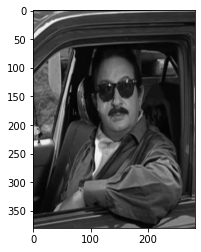

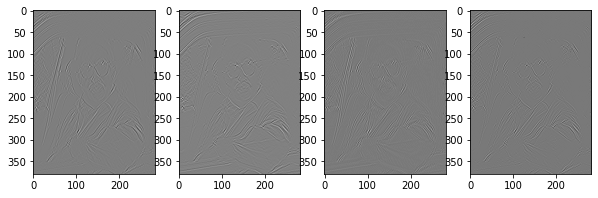

In [68]:
plt.imshow(img, cmap = plt.cm.gray)
fig ,ax = plt.subplots(1,4)
fig.set_figwidth(10)
fig.set_figheight(5)
ax[0].imshow(X[0], cmap = plt.cm.gray)
ax[1].imshow(X[1], cmap = plt.cm.gray)
ax[2].imshow(X[2], cmap = plt.cm.gray)
ax[3].imshow(X[3], cmap = plt.cm.gray)

In [69]:
rects = detect_faces(X, H_set1)  

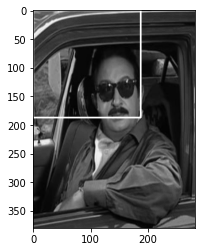

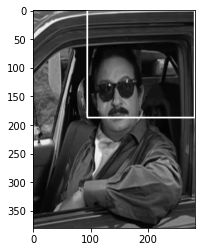

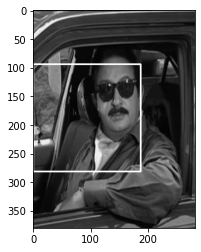

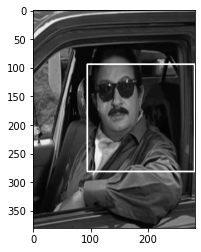

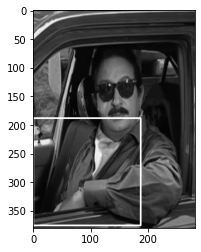

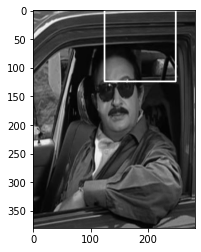

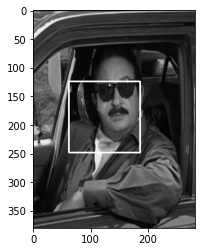

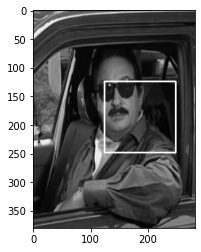

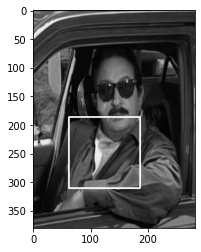

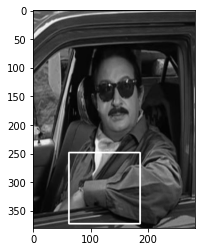

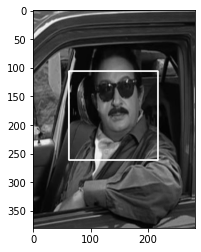

In [70]:
draw_all_rects(img, rects,color = 255)  
draw_grouped_rects(img, rects, color = 255)  

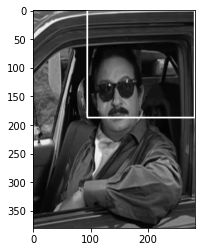

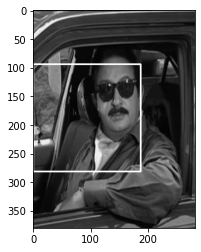

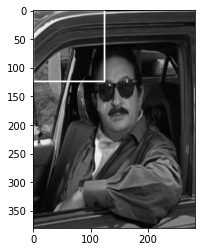

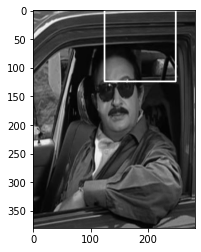

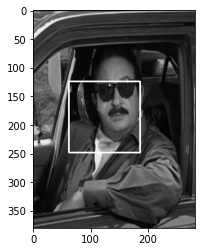

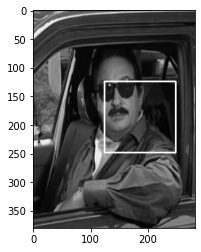

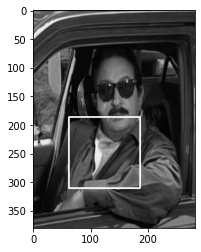

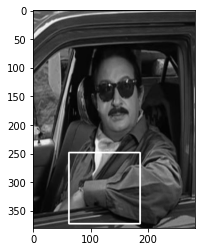

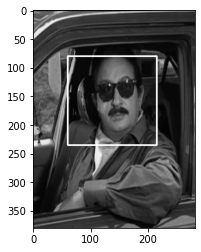

In [71]:
rects = detect_faces(X, H_set2)  
draw_all_rects(img, rects,color = 255)  
draw_grouped_rects(img, rects, color = 255)  

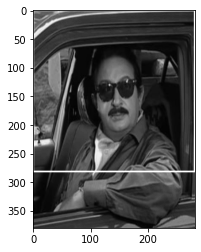

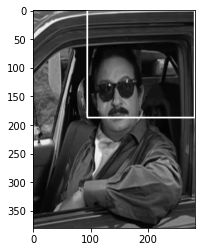

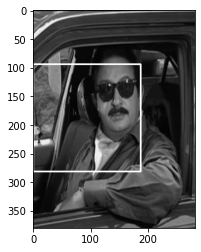

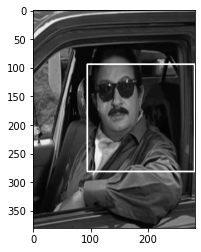

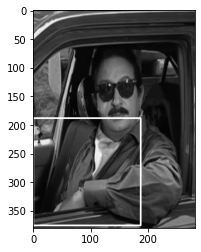

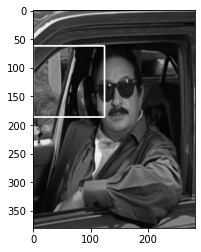

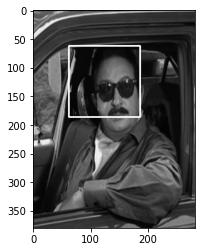

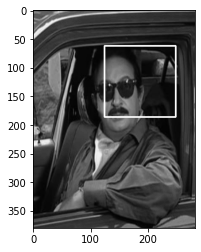

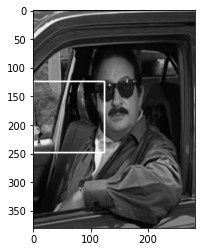

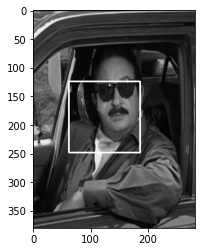

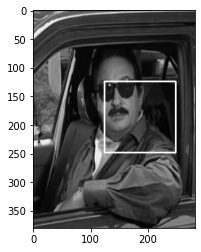

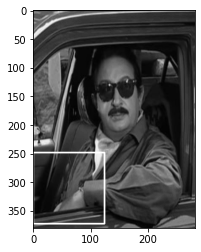

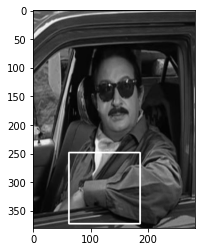

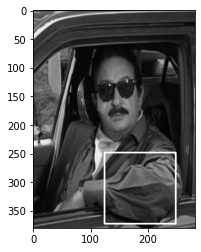

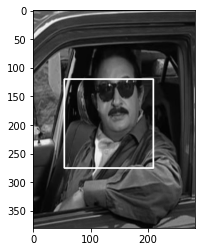

In [72]:
rects = detect_faces(X, H_set3)  
draw_all_rects(img, rects,color = 255)  
draw_grouped_rects(img, rects, color = 255)  

In [73]:
def test(path):
  img, X = prepare_single_img(path, width = 288, height = 384 )
  plt.figure()
  plt.imshow(img, cmap = plt.cm.gray)
  plt.show()
  fig ,ax = plt.subplots(1,4)
  fig.set_figwidth(10)
  fig.set_figheight(5)
  ax[0].imshow(X[0], cmap = plt.cm.gray)
  ax[1].imshow(X[1], cmap = plt.cm.gray)
  ax[2].imshow(X[2], cmap = plt.cm.gray)
  ax[3].imshow(X[3], cmap = plt.cm.gray)
  plt.show()
  rects = detect_faces(X)
  # print(rects)
  draw_all_rects(img, rects)  
  draw_grouped_rects(img, rects)  

In [80]:
def prepare_single_img_test(img, width, height):
  # img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  # img = cv2.resize(img, (width,height), 0.5, 0.5)
  i_img = get_integralimage(img)
  img1 = extract_features(img, TWO_H_FILTER, 3)
  img2 = extract_features(img, TWO_V_FILTER, 3)
  img3 = extract_features(img, THREE_FILTER, 3)
  img4 = extract_features(img, FOUR_FILTER, 3)
  (w,h) = (np.min([img1.shape[1],img2.shape[1],img3.shape[1],img4.shape[1]]),
           np.min([img1.shape[0],img2.shape[0],img3.shape[0],img4.shape[0]]))
  return img[:h, :w],(img1[:h, :w],img2[:h, :w],img3[:h, :w],img4[:h, :w],)

In [81]:
def measure_performance(img, H_set):
  t1 = time.time()
  __, X = prepare_single_img_test(img, width = 288, height = 384 )
  rects = detect_faces(X, H_set) 
  return time.time() - t1 

In [89]:
time1 = 0; time2 = 0; time3 = 0
for i in range(10):
  time1 += measure_performance(img, H_set1)
  time2 += measure_performance(img, H_set2)
  time3 += measure_performance(img, H_set3)
time1 /= 10; time2/=10; time3/=10
print(f"FloatBoost Avg. Time = {time1}\Avg nEFloatBoost Avg. Time = {time2}\nAdaBoost Avg. Time = {time3}")

FloatBoost time = 5.425316977500915
EFloatBoost time = 6.48730833530426
AdaBoost time = 9.02763204574585


In [87]:
# test('/content/test_img.jpg')

In [88]:
# test('/content/test_img2.jpeg')

In [ ]:
# test('/content/test_img3.jpg')

In [ ]:
# test('/content/test_img4.jpg')


In [ ]:
# multi_scale_preds = []
# test_img = cv2.imread('/content/test_img3.jpg',cv2.IMREAD_GRAYSCALE)
# test_img = cv2.resize(test_img, (288,384), 0.5, 0.5)
# print(test_img.shape)
# t1 = time.time()
# scale_detector(test_img)
# print(time.time() - t1)
# for eps in np.arange(0.1, 1.1, 0.1):
#   print(f"epselon {eps}")
#   draw_rect(test_img.copy(),eps)

In [ ]:
# multi_scale_preds = []
# test_img = cv2.imread('/content/48083436.webp',cv2.IMREAD_GRAYSCALE)
# test_img = cv2.resize(test_img, (200,200), 0.5, 0.5)
# print(test_img.shape)
# t1 = time.time()
# scale_detector(test_img)
# print(time.time() - t1)
# for eps in np.arange(0.1, 1.1, 0.1):
#   print(f"epselon {eps}")
#   draw_rect(test_img.copy(),eps)

In [ ]:
# preds = np.asarray(multi_scale_preds)
# preds = preds.reshape((len(preds)//4,4))
# preds = preds.tolist()
# # grouped_preds = cv2.groupRectangles(preds,groupThreshold = 1, eps = eps)
# for i, j , ws, _ in preds:
#     print(i, j, ws)
#     test_img1 = test_img.copy()
#     test_img1 = cv2.rectangle(test_img1, (i,j),(i+ws-1,j+ws-1),(255,255,255),2)
#     plt.imshow(test_img1,cmap= plt.cm.gray)
#     plt.show()

In [ ]:
# multi_scale_preds = []
# test_img = cv2.imread('/content/test_img.jpg',cv2.IMREAD_GRAYSCALE)
# print(test_img.shape)
# # mobile resolution
# test_img = cv2.resize(test_img, (120,240), 0.5,0.5)
# plt.imshow(test_img, cmap = plt.cm.gray)
# print(test_img.shape)
# t1 = time.time()
# # test_img = prepare(test_img)
# scale_detector(test_img)
# detection_time = time.time() - t1
# draw_rect(test_img)
# print(detection_time/60)

In [ ]:
# preds = np.asarray(multi_scale_preds)
# preds = preds.reshape((len(preds)//4,4))
# # grouped_preds = cv2.groupRectangles(preds,groupThreshold = 1, eps = 1)

In [ ]:
# np.save('preds.npy', preds)
# preds = preds.tolist()
# grouped_preds = cv2.groupRectangles(preds,1, 1)


In [ ]:
# grouped_preds = cv2.groupRectangles(preds,1, 1)

In [ ]:
# multi_scale_preds = []
# test_img = cv2.imread('Dataset/train/face/1 (5454).jpg',cv2.IMREAD_GRAYSCALE)
# scale_detector(test_img)
# draw_rect(test_img)

In [ ]:
# multi_scale_preds = []
# test_img = cv2.imread('Dataset/train/face/1 (6372).jpg',cv2.IMREAD_GRAYSCALE)
# scale_detector(test_img)
draw_rect(test_img)

In [ ]:
test_img = cv2.imread('Dataset/train/face/1 (6372).jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img, cmap =  plt.cm.gray)

In [ ]:
os.listdir('Dataset/train/face')

In [ ]:

acc = []
j = 0
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
  for g in ['auto', 'scale']:
      svm_cl = SVC(kernel= k, gamma = g, C =0.1,max_iter = 1000)
      svm_cl.fit(x_train[:,:-1], x_train[:,-1])
      acc.append([k, g, f'{svm_cl.score(x_train[:,:-1],x_train[:,-1])}'])

In [ ]:
accnp = np.array(acc)
# accnp[accnp.argmax(accnp[:,-1])]
accnp[np.argmax(accnp[:,-1])]

In [ ]:
def learn_model(x_train, W):
  acc_list = []
  max_err = sys.maxsize
  factor = 10
  C = [0.1 * (factor**i) for i in range(4)]
  for feature in range(4):
    y_train = x_train[feature][:,-1]
    X = x_train[feature][:,:-1]
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
      for g in ['auto', 'scale']:
        for c in C:
          svm_cl = SVC(kernel= k, gamma = g, C = c, max_iter = 1000)
          svm_cl.fit(X, y_train)
          preds = svm_cl.predict(X)
          err_rate = np.sum(W[preds != y_train])
          if err_rate < max_err: 
            model = (svm_cl, feature)
            max_err = err_rate
  return model

In [ ]:
# model = learn_model(x_train[:,:-1], x_valid[:,:-1], x_train[:,-1], x_valid[:,-1])

In [ ]:
# model.predict(x_train[:,:-1])[0]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
H_set = FloatBoost(x_train,len(x_train[0])  , 10, 0.05)

In [ ]:
acc , preds = predict_fboost(H_set[0], x_train)
print("Number of classifiers selected (train set):", len(H_set))
print("Total accuracy %", acc)

In [ ]:
acc , preds = predict_fboost(H_set[0], x_test)
# print("Number of classifiers selected (test set):", len(H_set))
print("Total accuracy %", acc)

In [ ]:
# acc , preds = predict_fboost(H_set, x_test)
# # print("Number of classifiers selected (test set):", len(H_set))
# print("Total accuracy %", acc)

In [ ]:
# x_train.shape
# test model on generated dummy dataset 
# data = np.random.randint(255, size = (10, 2))
# data = np.append(data, np.random.choice([0,1],size = (10,1)), axis = 1)
# data.shape

# plt.figure()
# plt.scatter(data[:,0],data[:,1], c = data[:,-1])


In [ ]:
# x_train, x_valid

In [ ]:
# x_train, x_valid = train_test_split(data, test_size=0.2)

# H_set = FloatBoost(x_train.copy(), x_valid.copy() , 10, 0.05)

In [ ]:
# acc , preds = predict_fboost(H_set, x_train)
# print("Number of classifiers selected (train set):", len(H_set))
# print("Total accuracy %", acc)

In [ ]:
# acc , preds = predict_fboost(H_set, x_valid)
# print("Number of classifiers selected (train set):", len(H_set))
# print("Total accuracy %", acc)

In [ ]:
# # test model on generated dummy dataset 
# data = np.random.randint(255, size = (10, 2))
# data = np.append(data, np.random.choice([-1,1],size = (10,1)), axis = 1)
# data.shape

# plt.figure()
# plt.scatter(data[:,0],data[:,1], c = data[:,-1])

# X_train, X_test = train_test_split(data, test_size=0.2)
# print(X_train.shape)


# H_set = FloatBoost(X_train.copy(), X_test.copy() , 10, 0.005)




# acc , preds = predict_fboost(H_set, X_train)
# print("Number of classifiers selected (train set):", len(H_set))
# print("Total accuracy %", acc)

# plt.figure()
# plt.scatter(X_train[:,0],X_train[:,1], c = preds)
# plt.title("Predicted Classes")

# plt.figure()
# plt.scatter(X_train[:,0],X_train[:,1], c = X_train[:,-1])
# plt.title("Actual Classes")

# acc , preds = predict_fboost(H_set, X_test)
# print("Number of classifiers selected(test set):", len(H_set))
# print("Total accuracy %", acc)

# plt.figure()
# plt.scatter(X_test[:,0],X_test[:,1], c = preds)
# plt.xlim((0,255))
# plt.ylim((-10,255))
# plt.title("Predicted Classes")

# plt.figure()
# plt.scatter(X_test[:,0],X_test[:,1], c = X_test[:,-1])
# plt.xlim((0,255))
# plt.ylim((-10,255))
# plt.title("Actual Classes")




In [ ]:
# # show random images of humans 
# ls = os.listdir("Humans")
# for idx in np.random.randint(len(ls), size = 5):
#   img = cv.imread("Humans/"+ls[idx])
#   img = cv.resize(img, (100,100))
#   cv2_imshow(img)

In [ ]:
# img = cv.imread("Humans/"+ls[0], cv.IMREAD_GRAYSCALE )
# img = cv.resize(img, (20,20))
# integ_img = get_integralimage(img)
# integ_img.min(), integ_img.max(), integ_img.mean()

In [ ]:
# # read images of faces

# ext = ['png', 'jpg'] 
# files = []
# [files.extend(glob.glob('Humans/' + '*.' + e)) for e in ext]
# images = [get_integralimage(cv.resize(cv.imread(file, cv.IMREAD_GRAYSCALE), (20,20))).flatten() for file in files]
# print(len(images), len(images[0]))

In [ ]:
# X = np.append(images, np.ones((len(images), 1)), axis= 1)
# X.shape

In [ ]:
# download images of non-faces


In [ ]:
# #read non-faces images 
# ext = ['png', 'jpg'] 
# files = []
# folders = os.listdir('natural_images')

# [files.extend(glob.glob('natural_images/'+folder+'/' + '*.' + e)) for e in ext for folder in folders]
# images2 = [get_integralimage(cv.resize(cv.imread(file, cv.IMREAD_GRAYSCALE), (20,20))).flatten() for file in files]
# print(len(images2), len(images2[0]))

In [ ]:
# X2 = np.append(images2, np.zeros((len(images2), 1)), axis= 1)
# X2.shape

In [ ]:
# dataset = np.append(X, X2, axis = 0)
# dataset.shape

In [ ]:
# np.random.shuffle(dataset)

In [ ]:
# fig = plt.hist(dataset[:,-1], bins = [-1,1],rwidth=0.5)
# plt.title("distribution of dataset")
# plt.ylabel("# images")
# plt.xlabel("Class")
# plt.xticks([-1,1], ["Non-Face", "Face"])
# print()

In [ ]:
# # random images from non-faces dataset 
# idx = np.random.randint(len(files), size = 5)
# _ = [cv2_imshow(cv.resize(cv.imread(file), (100,100))) for file in np.array(files)[idx]]

In [ ]:
# X_train, X_test = train_test_split(dataset, test_size=0.2)

In [ ]:
# preds = clf.predict(X_test[:,:-1], batch_size = 256)

In [ ]:
# (preds == X_test[:,-1]).mean()

In [ ]:
# preds_train = clf.predict(X_train[:,:-1], batch_size = 256)

In [ ]:
# (preds_train == X_train[:,-1]).mean()

In [ ]:
# H_set = FloatBoost(X_train, 10, 0.005)

In [ ]:
# acc , preds = predict_fboost(H_set, X_train)
# print("Number of classifiers selected (train set):", len(H_set))
# print("Total accuracy %", acc)

# Convert h5 to TfLite

In [ ]:
h0_lite = tf.lite.TFLiteConverter.from_keras_model(h0).convert()
h1_lite = tf.lite.TFLiteConverter.from_keras_model(h1).convert()

INFO:tensorflow:Assets written to: /tmp/tmp85qwiibg/assets


INFO:tensorflow:Assets written to: /tmp/tmp85qwiibg/assets


INFO:tensorflow:Assets written to: /tmp/tmpmk_yih71/assets


INFO:tensorflow:Assets written to: /tmp/tmpmk_yih71/assets


In [ ]:
open("h0.tflite", "wb").write(h0_lite)
open("h1.tflite", "wb").write(h1_lite)

34580